In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_As(cosmo_param_file, comb_points):
    As_all = np.loadtxt(cosmo_param_file, usecols=3)
    As = As_all[comb_points]
    return As

def get_points_from_ele(elements):
    n_leftbr = 0
    n_rightbr = 0
    points = []
    i_start = len(elements)

    for i in range(len(elements)):
        if elements[i][0]=='[':
            n_leftbr += 1
            if n_leftbr==2:
                i_start = i
                points.append(int(elements[i][1:-1]))
        elif elements[i][-1]==']':
            n_rightbr += 1
            if n_rightbr==2:
                points.append(int(elements[i][:-1]))
                break
        elif i > i_start:
            points.append(int(elements[i][:-1]))
    return points
        

def read_best_slices(file_path, chains, n_opt):

# Initialize empty lists to store the data
    beams_list = []
    n_optimization_restarts_list = []
    best_points_list = []
    loss_list = []
    

# Open and read the file
    with open(file_path, 'r') as file:
    # Skip the first line (header)
        next(file)
    
    # Process each line in the file
        for line in file:
        # Split the line into individual elements
            elements = line.strip().split()

        # Extract data from each element
            beams = int(elements[2])
            best_points = get_points_from_ele(elements)
            loss = float(elements[-2])
            n_optimization_restarts = int(elements[3])
        # Append the extracted data to the respective lists
            beams_list.append(beams)
            best_points_list.append(best_points)
            loss_list.append(loss)
            n_optimization_restarts_list.append(n_optimization_restarts)

# Print or use the extracted data as needed
    print("beams_list:", beams_list)
    print("best_points_list:", best_points_list)
    print("loss_list:", loss_list)
    print("n_optimization_restarts_list:", n_optimization_restarts_list)

    i_start = len(loss_list)
    for i in range(len(loss_list)):
        
        if beams_list[i]==chains and n_optimization_restarts_list[i]==n_opt:
            i_start = i 
        if i > i_start and beams_list[i]==0 and n_optimization_restarts_list[i]==0:
            i_end = i 
        elif i > i_start and beams_list[i]!=0:
            break

    best_points_list = best_points_list[i_start:i_end+1]
    loss_list = np.array(loss_list[i_start:i_end+1])

    return best_points_list, loss_list




In [3]:
cosmo_param_file = "/bigdata/birdlab/yyang440/cosmo_11p_sims/data_for_emu/cosmo_11p_Box250_Part750_data/train_input.txt"
file = "best_slices.txt"

chains = 32
n_opt = 20

comb_points, losses = read_best_slices(file, chains, n_opt)


beams_list: [8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
best_points_list: [[996, 997, 998, 999, 940, 941, 942, 943], [452, 453, 454, 455, 420, 421, 422, 423], [1076, 1077, 1078, 1079, 736, 737, 738, 739], [424, 425, 426, 427, 1048, 1049, 1050, 1051], [1008, 1009, 1010, 1011, 416, 417, 418, 419], [64, 65, 66, 67, 92, 93, 94, 95], [648, 649, 650, 651, 416, 417, 418, 419], [268, 269, 270, 271, 428, 429, 430, 431], [996, 997, 998, 999, 940, 941, 942, 943], [328, 329, 330, 331, 212, 213, 214, 215], [1028, 1029, 1030, 1031, 144, 145, 146, 147], [1076, 1077, 1078, 1079, 736, 737, 738, 739], [64, 65, 66, 67, 92, 93, 94, 95], [424, 425, 426, 427, 772, 773, 774, 775], [948, 949, 950, 951, 736, 737, 738, 739], [648, 649, 650, 651, 812, 813, 814, 815], [996, 997, 998, 999, 940, 941, 942, 943], [1028, 1

In [4]:
As = get_As(cosmo_param_file, comb_points) # 

In [5]:
As

array([[2.013750e-09, 2.516250e-09, 1.580893e-09, 2.130536e-09,
        2.088750e-09, 2.687679e-09, 2.203393e-09, 1.517679e-09],
       [1.629107e-09, 2.546250e-09, 1.841250e-09, 2.240893e-09,
        2.195893e-09, 2.674821e-09, 1.799464e-09, 1.932321e-09],
       [2.193750e-09, 1.691250e-09, 2.635179e-09, 2.001964e-09,
        2.506607e-09, 1.647321e-09, 2.251607e-09, 2.045893e-09],
       [2.024464e-09, 2.429464e-09, 1.784464e-09, 2.218393e-09,
        2.074821e-09, 2.515179e-09, 1.675179e-09, 2.231250e-09],
       [1.704107e-09, 2.201250e-09, 2.409107e-09, 1.965536e-09,
        2.024464e-09, 2.429464e-09, 1.784464e-09, 2.218393e-09],
       [1.821964e-09, 2.241964e-09, 1.510179e-09, 2.579464e-09,
        2.518393e-09, 2.052321e-09, 1.664464e-09, 2.247321e-09],
       [1.985893e-09, 2.477679e-09, 1.698750e-09, 2.348036e-09,
        2.020179e-09, 1.677321e-09, 2.446607e-09, 2.144464e-09],
       [1.648393e-09, 2.586964e-09, 2.139107e-09, 1.990179e-09,
        1.765179e-09, 2.668393e-0

In [6]:
As.shape

(32, 8)

In [7]:
As[0,:]

array([2.013750e-09, 2.516250e-09, 1.580893e-09, 2.130536e-09,
       2.088750e-09, 2.687679e-09, 2.203393e-09, 1.517679e-09])

In [8]:
As[:,0]

array([2.013750e-09, 1.629107e-09, 2.193750e-09, 2.024464e-09,
       1.704107e-09, 1.821964e-09, 1.985893e-09, 1.648393e-09,
       2.300893e-09, 1.847679e-09, 1.785536e-09, 1.665536e-09,
       1.708393e-09, 2.055536e-09, 2.200179e-09, 1.630179e-09,
       2.530179e-09, 1.667679e-09, 2.425179e-09, 2.089821e-09,
       1.793036e-09, 1.608750e-09, 2.373750e-09, 1.705179e-09,
       1.810179e-09, 2.626607e-09, 1.846607e-09, 2.636250e-09,
       2.105893e-09, 2.588036e-09, 2.067321e-09, 2.185179e-09])

In [9]:
As[1].mean()

2.107499875e-09

In [10]:
As_mean = np.mean(As, axis=1)

In [11]:
As_mean

array([2.09236625e-09, 2.10749987e-09, 2.12169638e-09, 2.11915175e-09,
       2.09209813e-09, 2.07950875e-09, 2.09986612e-09, 2.12879475e-09,
       2.10428562e-09, 2.06866075e-09, 2.05995525e-09, 2.08821425e-09,
       2.10696425e-09, 2.13656262e-09, 2.11205363e-09, 2.09611613e-09,
       2.10642863e-09, 2.08915175e-09, 2.07897338e-09, 2.12290162e-09,
       2.10482125e-09, 2.07964275e-09, 2.10669625e-09, 2.09531250e-09,
       2.06424112e-09, 2.10415175e-09, 2.08941950e-09, 2.07267862e-09,
       2.11486588e-09, 2.11165175e-09, 2.12745537e-09, 2.06839300e-09])

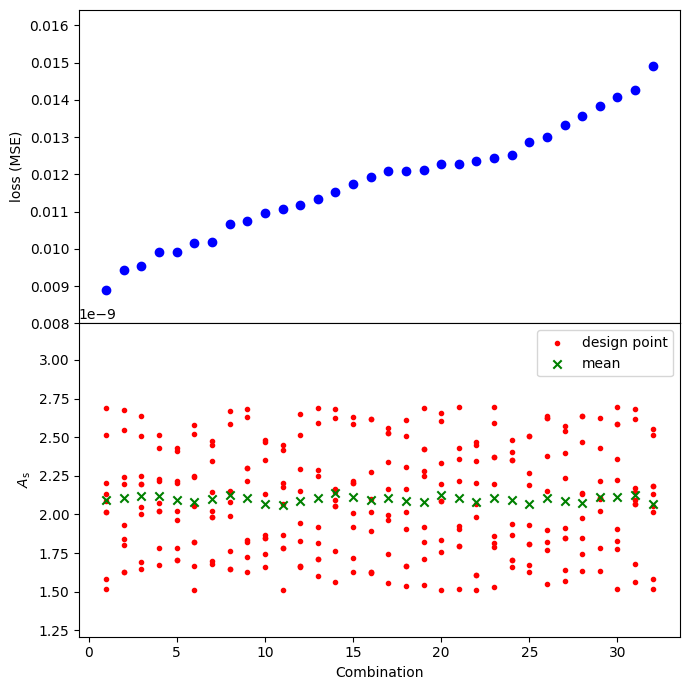

In [14]:


# Create some sample data

N_comb = len(As)

combs = np.arange(1, N_comb+1)

# Create a figure and two subplots (panels) sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7,7))

# Plot data on the upper panel (ax1)
ax1.scatter(combs, losses, color='blue', marker='o')
# ax1.set_title('Upper Panel')
# ax1.legend()

# Plot data on the lower panel (ax2)
N_point = len(As[0])

for i in range(N_point):  # N_point  (per comb)
    if i == 0:
        ax2.scatter(combs, As[:,i], label='design point', color='red', marker='.')
    ax2.scatter(combs, As[:,i], color='red', marker='.')

ax2.scatter(combs, As_mean, label="mean", color='green', marker='x')

# ax2.set_title('Lower Panel')
ax2.legend()
ax2.set_ylim([.8*As.min(),1.2*As.max()])

ax1.set_ylim([.9*losses.min(),1.1*losses.max()])

# Add labels to the x-axis and y-axes
# fig.suptitle('Two Panels with Shared X-axis')
ax2.set_xlabel('Combination')
ax1.set_ylabel('loss (MSE)')
ax2.set_ylabel(r'$A_\mathrm{s}$')

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(hspace=0.0)

# Show the plot
plt.show()


In [13]:
combs

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])